# Linear Regression - Assignment

Building a Linear Regression Model to predict Car Prices and interpret what are the factors that affect the price of a car the most.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data.

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

**Forunately, There are no missing values in any of the columns.**

## 1. Data Cleaning

The `CarName` column looks like it is comprised of Car Manafacturer and Car Model. We are only considering the car manafacturer for this modelling.

In [3]:
# Splitting and retaining only the car manfacturer and dropping car model name.

data.CarName = data.CarName.apply(lambda x: x.split()[0].lower())
data.CarName.head(5)

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

In [4]:
data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

here we can see the following are the same car companies with different names. May be typos during data sourcing

- maxda -> **mazda**
- porcshce -> **porsche**
- toyouta -> **toyota**
- vokswagen -> **volkswagen**
- vw -> **volkswagen**

In [5]:
def fix_car_name_typos(car_name):
    if car_name == 'maxda':
        return 'mazda'
    elif car_name == 'porcshce':
        return 'porsche'
    elif car_name == 'toyouta':
        return 'toyota'
    elif car_name == 'vokswagen' or car_name == 'vw':
        return 'volkswagen'
    else:
        return car_name

data.CarName = data.CarName.apply(fix_car_name_typos)
data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [6]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


So now we're dealing with a dataset with 26 attributes. 

## 2. Exploratory Data Analysis

### Univariate Analysis

#### Let's see how car price varies among manafacturers

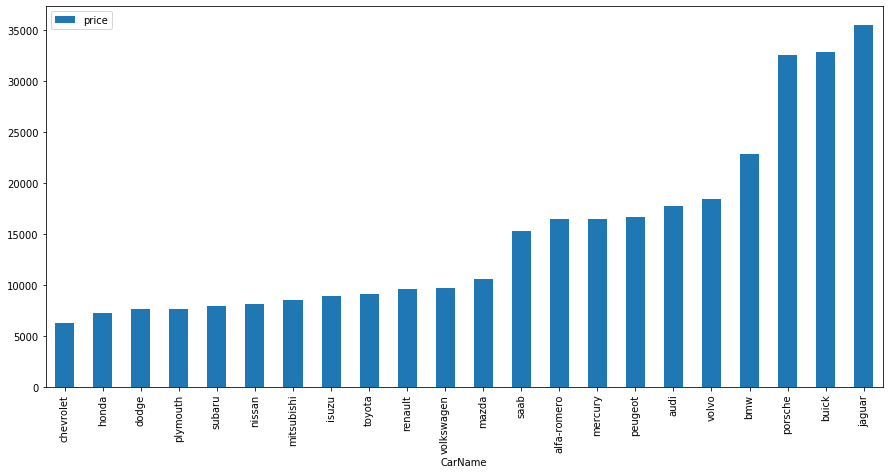

In [7]:
a = data.groupby(['CarName']).median().sort_values(by='price').plot(y='price', kind='bar', figsize=(15, 7))

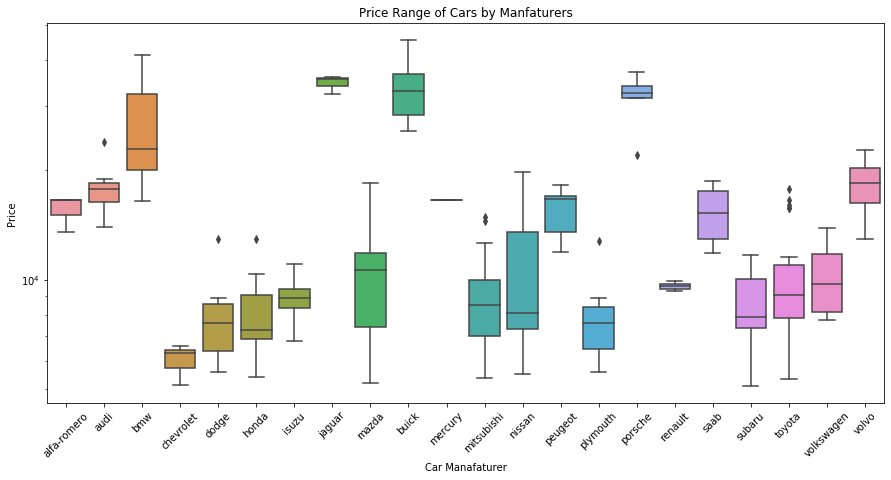

In [8]:
plt.figure(figsize=(15, 7))
a = sns.boxplot(x='CarName', y='price', data=data)
a.set(title='Price Range of Cars by Manfaturers', xlabel='Car Manafaturer', ylabel='Price')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

**The manafaturer of the car has definitely a high impact on the pricing**

* **Jaguar** has the highest median pricing of the whole cars but **Buick** has its whisker above all.
* **Chevorlet** produces cars with least median pricing among all

**SINCE WE WANT TO INTERPRET WHAT PARAMETERS AFFECT CAR PRICING, WHICH CAR MANAFACTURER PRODUCED THE CAR WON'T GIVE MUCH IMPORTANCE TO GEELY AUTOS. SO WE'LL CREATE 3 BUCKETS, LUXURY_CAR, EXPENSIVE_CAR AND BUDGET_CAR BASED ON THEIR MEDIAN PRICE AND THEN CONTINUE THE ANALYSIS**

In [9]:
set(data.CarName)

{'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo'}

* luxury_car
    * bmw
    * porsche
    * buick
    * jaguar
* expensive_car
    * saab
    * alfa-romero
    * mercury
    * peugeot
    * audi
    * volvo
* budget_car
    * chevrolet
    * dodge
    * honda
    * isuzu
    * mazda
    * mitsubishi
    * nissan
    * plymouth
    * renault
    * subaru
    * toyota
    * volkswagen

In [10]:
# We'll create a method to bucket the carname into LUXURY_CAR, EXPENSIVE_CAR AND BUDGET_CAR
def find_price_bucket(manafacturer):
    if manafacturer in ['bmw', 'porsche', 'buick', 'jaguar']:
        return 'luxury_car'
    elif manafacturer in ['saab', 'alfa-romero', 'mercury', 'peugeot', 'audi', 'volvo']:
        return 'expensive_car'
    else:
        return 'budget_car'

In [11]:
# Categorize these cars into price buckets
data['price_bucket'] = ''
data.price_bucket = data.CarName.apply(find_price_bucket)
data.head(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_bucket
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,expensive_car
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,expensive_car
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,expensive_car
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,expensive_car
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,expensive_car
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,expensive_car
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,expensive_car
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,expensive_car
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,expensive_car
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,expensive_car


In [12]:
# Popping off CarName variable as it is not needed anymore
data.pop('CarName')
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_bucket
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,expensive_car
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,expensive_car
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,expensive_car
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,expensive_car
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,expensive_car


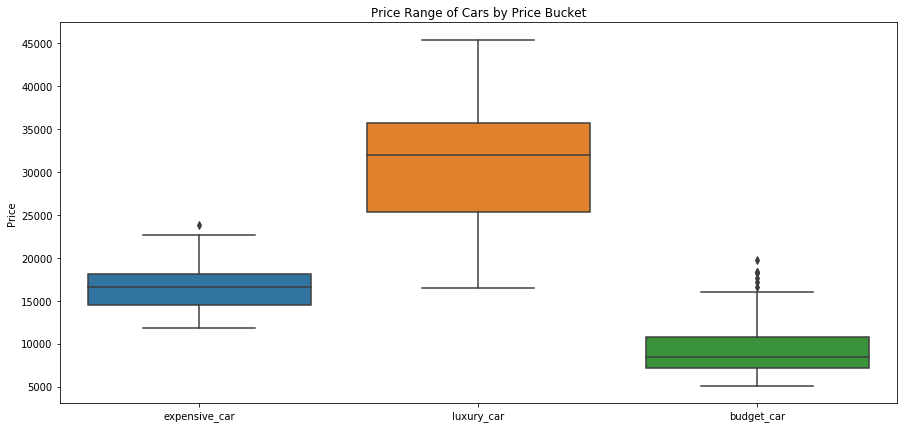

In [13]:
plt.figure(figsize=(15, 7))
a = sns.boxplot(x='price_bucket', y='price', data=data)
a.set(title='Price Range of Cars by Price Bucket', xlabel='', ylabel='Price')
# plt.yscale('log')
plt.show()


#### Let's plot and look at how the following binary categorical variables affect car pricing
* `fueltype`
* `aspiration`
* `doornumber`
* `enginelocation`

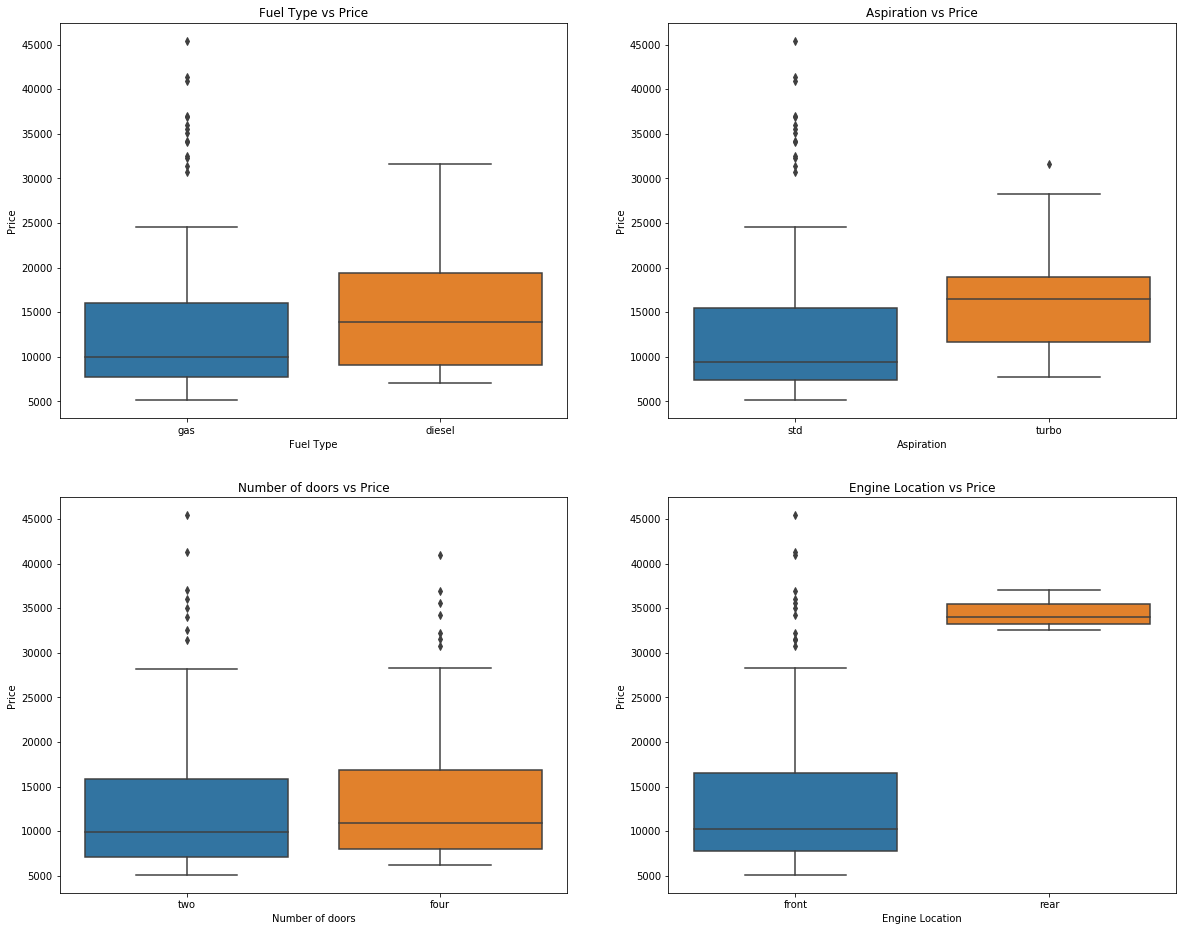

In [14]:
fig, ax = plt.subplots(2,2, figsize=(20, 16))
a = sns.boxplot(x='fueltype', y='price', data=data, ax=ax[0][0])
b = sns.boxplot(x='aspiration', y='price', data=data, ax=ax[0][1])
c = sns.boxplot(x='doornumber', y='price', data=data, ax=ax[1][0])
d = sns.boxplot(x='enginelocation', y='price', data=data, ax=ax[1][1])
a.set(title='Fuel Type vs Price', xlabel='Fuel Type', ylabel='Price')
b.set(title='Aspiration vs Price', xlabel='Aspiration', ylabel='Price')
c.set(title='Number of doors vs Price', xlabel='Number of doors', ylabel='Price')
d.set(title='Engine Location vs Price', xlabel='Engine Location', ylabel='Price')
plt.show()

**Here we can see that,**
 * Cars that runs on diesel are more priced than those which run on gas.
 * Cars that has a turbo aspiration is priced higher than the cars with standard aspiration
 * The number of doors a car has does not affect it's pricing much, still the median price of cars with four doors are slightly higher than those with twodoors
 * The Cars whose engines are located in the rear are tremendously expensive than those cars with engines located in the front.
 

#### Plotting price against the rest of the categorical variables

* `symboling`
* `carbody`
* `drivewheel`
* `enginetype`
* `cylindernumber`
* `fuelsystem`
 

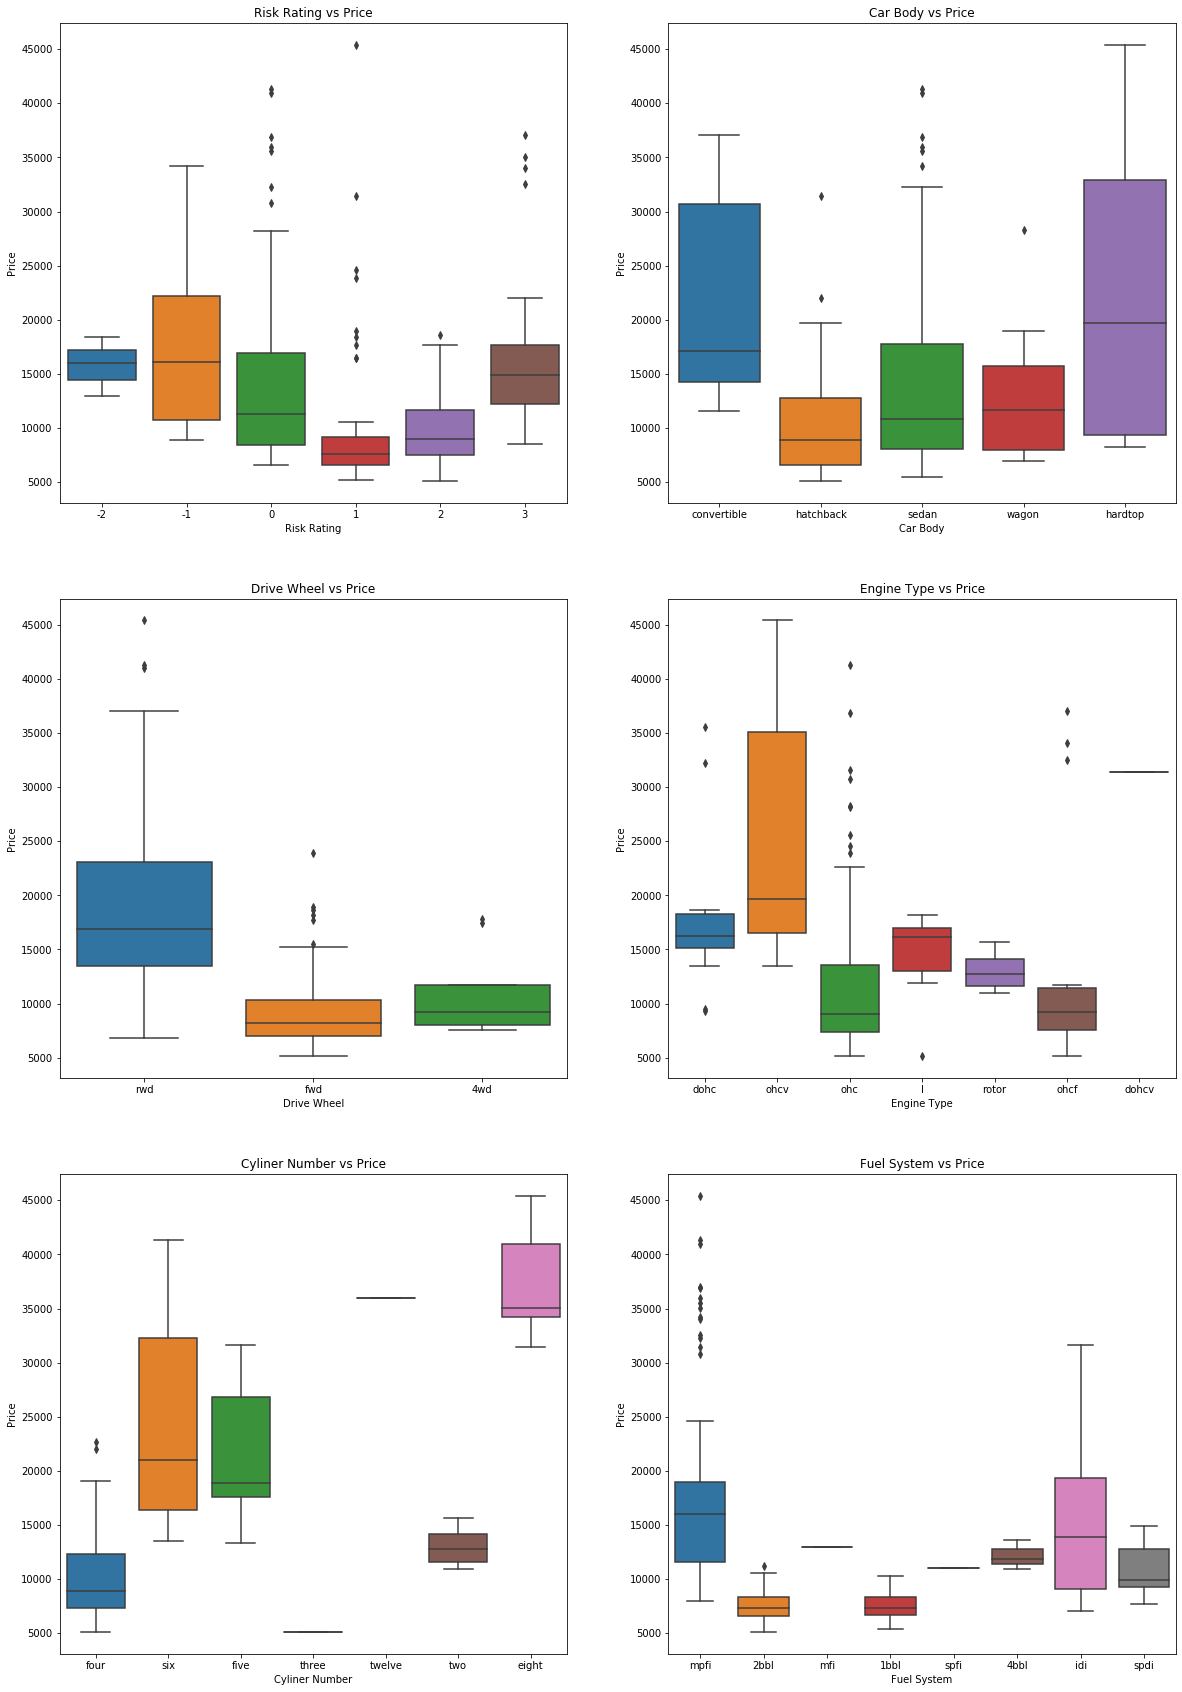

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
a = sns.boxplot(x='symboling', y='price', data=data, ax=ax[0][0])
b = sns.boxplot(x='carbody', y='price', data=data, ax=ax[0][1])
c = sns.boxplot(x='drivewheel', y='price', data=data, ax=ax[1][0])
d = sns.boxplot(x='enginetype', y='price', data=data, ax=ax[1][1])
e = sns.boxplot(x='cylindernumber', y='price', data=data, ax=ax[2][0])
f = sns.boxplot(x='fuelsystem', y='price', data=data, ax=ax[2][1])
a.set(title='Risk Rating vs Price', xlabel='Risk Rating', ylabel='Price')
b.set(title='Car Body vs Price', xlabel='Car Body', ylabel='Price')
c.set(title='Drive Wheel vs Price', xlabel='Drive Wheel', ylabel='Price')
d.set(title='Engine Type vs Price', xlabel='Engine Type', ylabel='Price')
e.set(title='Cyliner Number vs Price', xlabel='Cyliner Number', ylabel='Price')
f.set(title='Fuel System vs Price', xlabel='Fuel System', ylabel='Price')
plt.show()

**Analysis'**
* Very safe cars (with low risk rating) and very risky cars (with high risk rating) are priced higher than normal cars. Seems like a pretty good predictor for the model.
* Highest priced cars have hardtop car body. Also some hardtop cars are priced lower than other car body types. This doesn't look much helpful in building a model.
* Cars with convertible body have a very large 3rd quartile and most of it is above 3rd quartile. Seems like another good predictor variable for the model.
* Rear wheel drive vehicles are priced quite higher than front wheel and four wheel drive vehicles.
* Vehicles with OHCV Engine Type has very long 3rd quartile and hence would be good predictor. But number of samples in the datset with DOHCV engine type is very low hence we see only one whisker representing it. But Vehicles with DOHCV engine type is priced highest as per data.
* Number of cylinders in engine also affects pricing of the model. The Cars with 8 cylinder engine are the highest priced cars. There is scarcity of samples of cars with 12 cylinder and 3 cylinder engines so we cannot be sure about cars with 12 cylinder engines even if their median is slightly higher than that of 8 cylinders.
* Cars with MPFI fuel systems are higher priced than the rest

#### Plotting the Numerical Variables

* `carlength`           
* `carwidth`            
* `carheight`           
* `wheelbase`
* `curbweight`          
* `enginesize`           
* `boreratio`           
* `stroke`   
* `compressionratio`

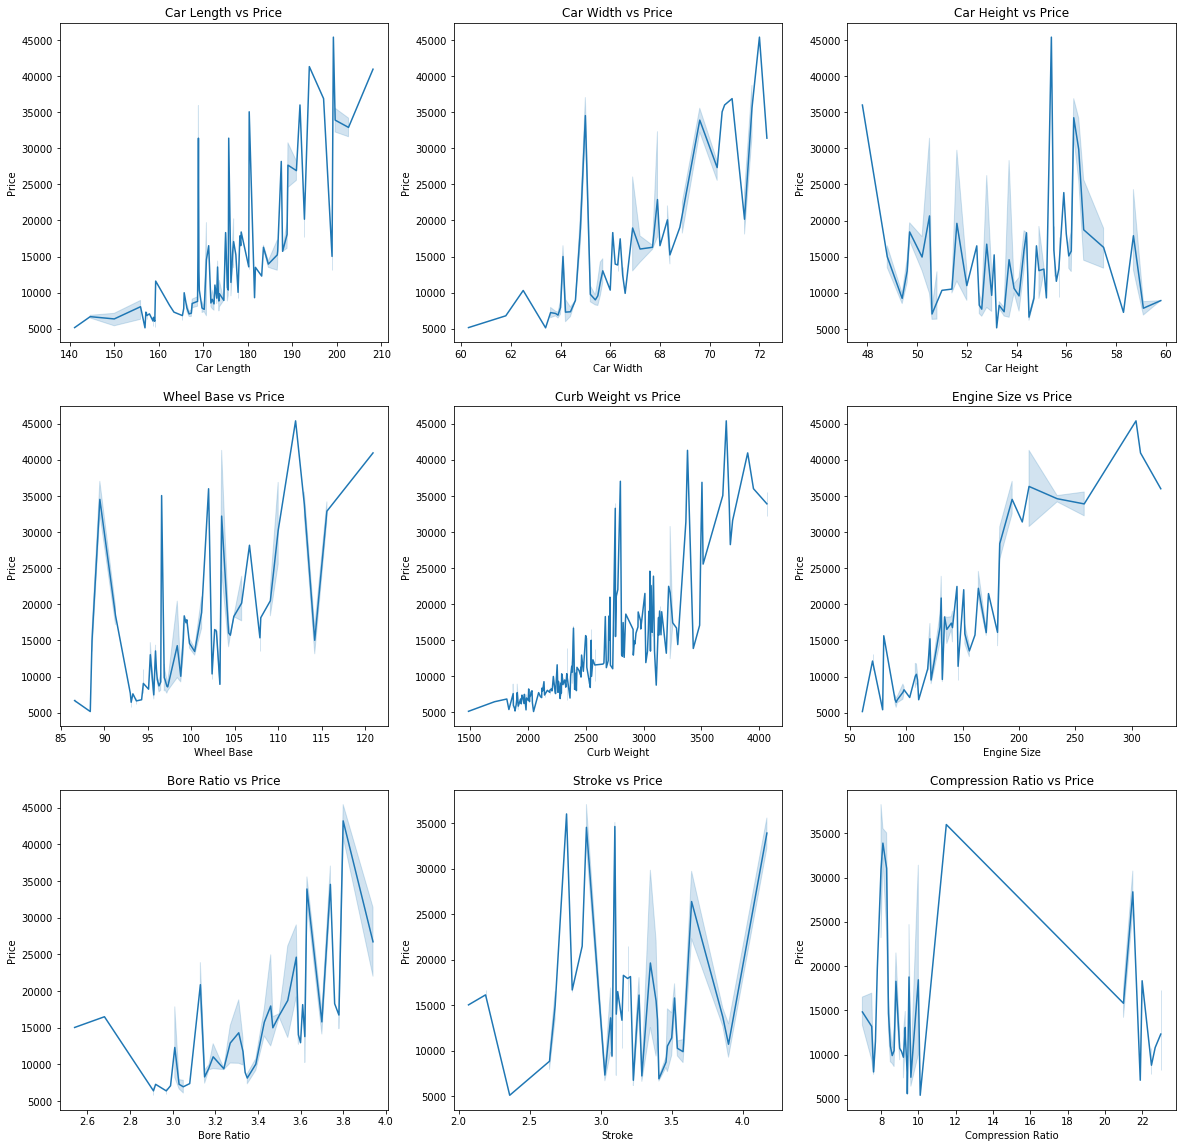

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
a = sns.lineplot(x='carlength', y='price', data=data, ax=ax[0][0])
b = sns.lineplot(x='carwidth', y='price', data=data, ax=ax[0][1])
c = sns.lineplot(x='carheight', y='price', data=data, ax=ax[0][2])
d = sns.lineplot(x='wheelbase', y='price', data=data, ax=ax[1][0])
e = sns.lineplot(x='curbweight', y='price', data=data, ax=ax[1][1])
f = sns.lineplot(x='enginesize', y='price', data=data, ax=ax[1][2])
g = sns.lineplot(x='boreratio', y='price', data=data, ax=ax[2][0])
h = sns.lineplot(x='stroke', y='price', data=data, ax=ax[2][1])
i = sns.lineplot(x='compressionratio', y='price', data=data, ax=ax[2][2])

a.set(title='Car Length vs Price', xlabel='Car Length', ylabel='Price')
b.set(title='Car Width vs Price', xlabel='Car Width', ylabel='Price')
c.set(title='Car Height vs Price', xlabel='Car Height', ylabel='Price')
d.set(title='Wheel Base vs Price', xlabel='Wheel Base', ylabel='Price')
e.set(title='Curb Weight vs Price', xlabel='Curb Weight', ylabel='Price')
f.set(title='Engine Size vs Price', xlabel='Engine Size', ylabel='Price')
g.set(title='Bore Ratio vs Price', xlabel='Bore Ratio', ylabel='Price')
h.set(title='Stroke vs Price', xlabel='Stroke', ylabel='Price')
i.set(title='Compression Ratio vs Price', xlabel='Compression Ratio', ylabel='Price')

plt.show()

The price seems to have a positive correlation with the following numeric attributes.
* `carlength`
* `carwidth`
* `wheelbase` (Even though the variance is quite high)
* `curbwight`
* `enginesize`
* `boreratio`

Another thing which was found during this univariate analysis is that there are NO cars with `compressionratio` between **12** and **20**

Plotting the rest of the numerical variables.
* `peakrpm`           
* `horsepower`            
* `citympg`           
* `highwaympg`

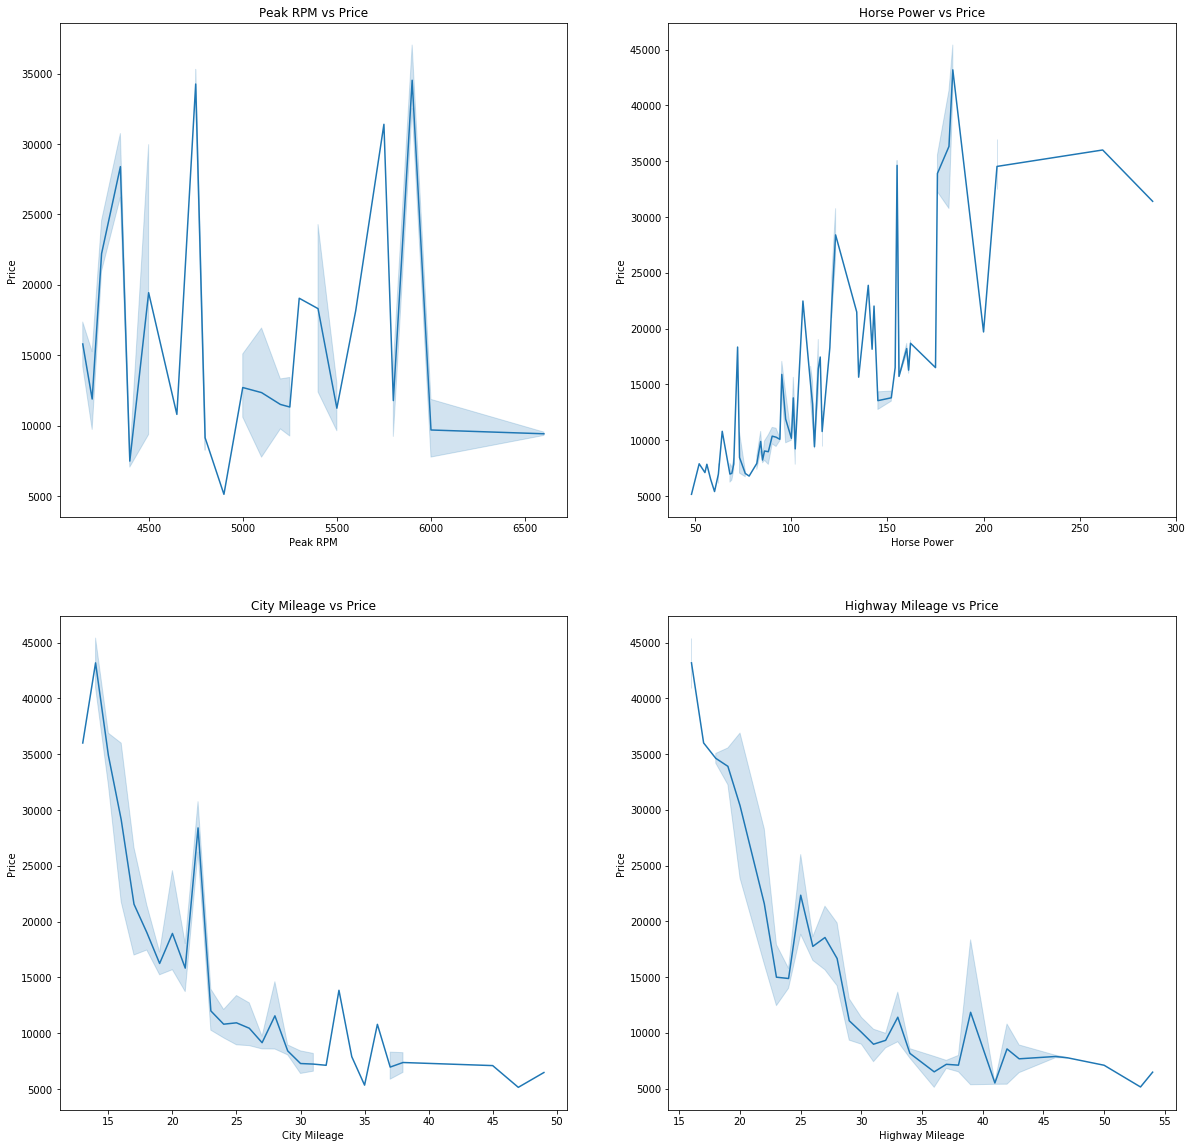

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
a = sns.lineplot(x='peakrpm', y='price', data=data, ax=ax[0][0])
b = sns.lineplot(x='horsepower', y='price', data=data, ax=ax[0][1])
c = sns.lineplot(x='citympg', y='price', data=data, ax=ax[1][0])
d = sns.lineplot(x='highwaympg', y='price', data=data, ax=ax[1][1])
a.set(title='Peak RPM vs Price', xlabel='Peak RPM', ylabel='Price')
b.set(title='Horse Power vs Price', xlabel='Horse Power', ylabel='Price')
c.set(title='City Mileage vs Price', xlabel='City Mileage', ylabel='Price')
d.set(title='Highway Mileage vs Price', xlabel='Highway Mileage', ylabel='Price')
plt.show()

The `horesepower` attribute has a **positive correlation** with the car pricing where as the `citympg` and `highwaympg` attributes have a **negative correlation** with the car pricing

### Bivariate Analysis

Let's plot the heatmap of numerical variables and see what all affects the car pricing.

In [18]:
# Popping of the car_ID variable
data.pop('car_ID')
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_bucket
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,expensive_car
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,expensive_car
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,expensive_car
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,expensive_car
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,expensive_car


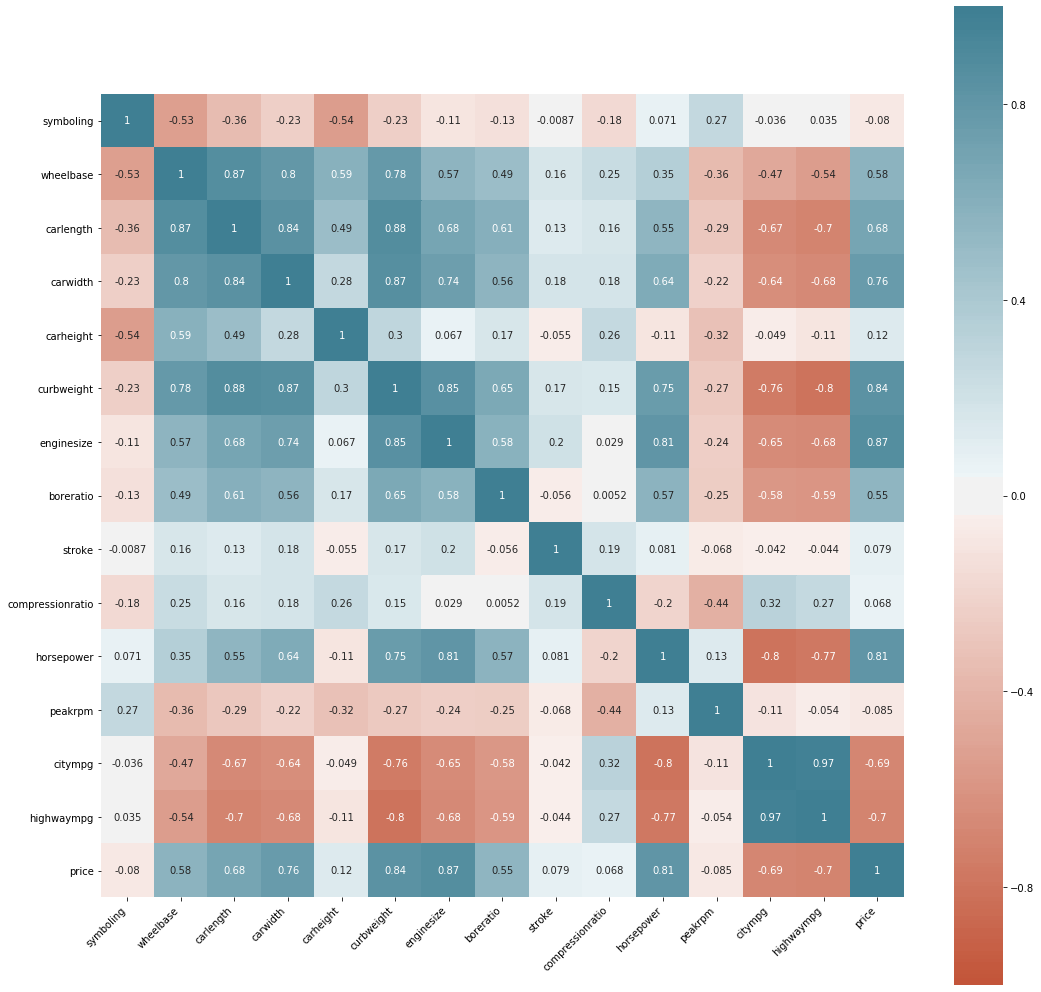

In [19]:
corr_matrix = data.corr()
plt.subplots(figsize=(18, 18))
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_ylim(15, 0)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

From the above heatmap. It is visible that car `price` is correlated with: (from positive to negative correlation)
1. `enginesize`
2. `curbweight`
3. `horsepower`
4. `carwidth`
5. `carlength`
6. `wheelbase`
7. `boreratio`
8. `carheight`
9. `stroke`
10. `compressionratio`
11. `symboling`
12. `peakrpm`
13. `citympg`
14. `highwaympg`

## 3. Data Preparation

### Creating Dummy variables for categorical variables.

In [20]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [21]:
data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [22]:
data.doornumber.unique()

array(['two', 'four'], dtype=object)

In [23]:
data.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [24]:
data.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [25]:
data.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [26]:
data.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [27]:
data.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [28]:
data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [29]:
data.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [30]:
data.price_bucket.unique()

array(['expensive_car', 'luxury_car', 'budget_car'], dtype=object)

We can use simple **apply** method to replace all the binary categorical variables with 0 or 1.

- `fueltype`
- `aspiration`
- `doornumber`
- `enginelocation`

In [31]:
data.fueltype = data.fueltype.apply(lambda x: 0 if x == 'gas' else 1)
data.aspiration = data.aspiration.apply(lambda x: 0 if x == 'std' else 1)
data.doornumber = data.doornumber.apply(lambda x: 0 if x == 'four' else 1)
data.enginelocation = data.enginelocation.apply(lambda x: 0 if x == 'front' else 1)

Dummies for other categorical variables

- `carbody`
- `drivewheel`
- `enginetype`
- `cylindernumber`
- `fuelsystem`
- `price_bucket`

I choose to treat the `symboling` categorical variable as a numerical variable since it is a ordered and numerical anyway.

In [32]:
dummy_carbody = pd.get_dummies(data['carbody'])
dummy_drivewheel = pd.get_dummies(data['drivewheel'])
dummy_enginetype = pd.get_dummies(data['enginetype'])
dummy_cylindernumber = pd.get_dummies(data['cylindernumber'], prefix='n_cyl')
dummy_fuelsystem = pd.get_dummies(data['fuelsystem'])
dummy_price_bucket = pd.get_dummies(data['price_bucket'])

Instead of dropping every first column, I choose to drop specific columns based on just gut feeling of importance.
* hatchback from dummy_carbody
* 4wd from dummy_drivewheel
* dohcv from dummy_enginetype
* n_cyl_three from dummy_cylindernumber
* spfi from dummy_fuelsystem
* budget_car from dummy_price_bucket

In [33]:
# dropping
dummy_carbody.pop('hatchback')
dummy_drivewheel.pop('4wd')
dummy_enginetype.pop('dohcv')
dummy_cylindernumber.pop('n_cyl_three')
dummy_fuelsystem.pop('spfi')
dummy_price_bucket.pop('budget_car')


# concatenating all the dummy dataframes to our main dataframe and create a new master dataframe
master = pd.concat([data, dummy_carbody, dummy_drivewheel, dummy_enginetype,
          dummy_cylindernumber, dummy_fuelsystem, dummy_price_bucket], axis=1)

# since we've added dummy variables for all categorical variables listed above, we don't need them in our dataset anymore. 
# so we can pop them off our master dataframe.

master.pop('carbody')
master.pop('drivewheel')
master.pop('enginetype')
master.pop('cylindernumber')
master.pop('fuelsystem')
master.pop('price_bucket')

master.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'convertible', 'hardtop',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohc', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'n_cyl_eight', 'n_cyl_five', 'n_cyl_four', 'n_cyl_six',
       'n_cyl_twelve', 'n_cyl_two', '1bbl', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'expensive_car', 'luxury_car'],
      dtype='object')

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

We'll split the entire dataset into Training data which consists of 75% of the whole data and test data which consists of the remaining 25% for validation purposes.

In [35]:
train_data, test_data = train_test_split(master, test_size=0.25, random_state=69)
train_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,n_cyl_two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,expensive_car,luxury_car
196,-2,0,0,0,0,104.3,188.8,67.2,56.2,2935,...,0,0,0,0,0,0,1,0,1,0
52,1,0,0,1,0,93.1,159.1,64.2,54.1,1905,...,0,0,1,0,0,0,0,0,0,0
101,0,0,0,0,0,100.4,181.7,66.5,55.1,3095,...,0,0,0,0,0,0,1,0,0,0
73,0,0,0,0,0,120.9,208.1,71.7,56.7,3900,...,0,0,0,0,0,0,1,0,0,1
70,-1,1,1,0,0,115.6,202.6,71.7,56.3,3770,...,0,0,0,0,1,0,0,0,0,1


### Scaling the data

We'll create a **MinMax Scaler** to scale all the values to be in range **0 and 1**. We'll fit it with train data and transform the train data with the scaler.

In [36]:
scaler = MinMaxScaler()
train_data.loc[:, train_data.columns] = scaler.fit_transform(train_data.loc[:, train_data.columns])
train_data.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,n_cyl_two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,expensive_car,luxury_car
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.563399,0.117647,0.196078,0.450980,0.013072,0.359058,0.494040,0.475490,0.494118,0.418027,...,0.013072,0.052288,0.294118,0.013072,0.117647,0.006536,0.450980,0.058824,0.189542,0.117647
std,0.247554,0.323248,0.398332,0.499225,0.113956,0.177807,0.183042,0.179381,0.199345,0.204146,...,0.113956,0.223337,0.457141,0.113956,0.323248,0.080845,0.499225,0.236067,0.393226,0.323248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.230321,0.391045,0.325000,0.350000,0.272304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,0.000000,0.000000,0.303207,0.483582,0.441667,0.525000,0.375097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,0.000000,0.460641,0.585075,0.550000,0.641667,0.561288,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We'll also apply the scaler transformation to test data also.

In [37]:
test_data.loc[:, test_data.columns] = scaler.transform(test_data.loc[:, test_data.columns])
test_data.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,n_cyl_two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,expensive_car,luxury_car
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.0,52.000000,52.000000
mean,0.576923,0.038462,0.134615,0.403846,0.019231,0.340771,0.485132,0.443269,0.492628,0.402571,...,0.038462,0.057692,0.403846,0.019231,0.038462,0.0,0.480769,0.0,0.192308,0.115385
std,0.255616,0.194184,0.344642,0.495454,0.138675,0.169727,0.188974,0.176461,0.217755,0.196918,...,0.194184,0.235435,0.495454,0.138675,0.194184,0.0,0.504505,0.0,0.397959,0.322603
min,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052239,0.125000,0.083333,0.128394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.230321,0.376119,0.306250,0.341667,0.247673,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,0.600000,0.000000,0.000000,0.000000,0.000000,0.282799,0.461194,0.408333,0.466667,0.347944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,0.000000,0.425656,0.656716,0.516667,0.645833,0.538790,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.804665,0.873134,0.925000,0.941667,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


## 4. Model Building

In [38]:
y_train = train_data.pop('price')
X_train = train_data
X_train = sm.add_constant(X_train)

We'll create a `build_model` method to do the repetitive task of building and evaluting the model

In [39]:
def build_model(y, X):
    lr_model = sm.OLS(y, X).fit()
    print(lr_model.summary())
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    y_pred = lr_model.predict(X)
    res = y - y_pred
    a = sns.distplot(res, ax=ax[0])
    b = sns.scatterplot(x=y, y=res, ax=ax[1])
    a.set(title='Error Distribution', xlabel='Error', ylabel='')
    b.set(title='Error Distribution', xlabel='Error', ylabel='')
    plt.show()
    return lr_model

### Model - 1

First let's create a model with all the variables.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     67.70
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           9.80e-62
Time:                        22:22:49   Log-Likelihood:                 277.52
No. Observations:                 153   AIC:                            -469.0
Df Residuals:                     110   BIC:                            -338.7
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1931      0.194  

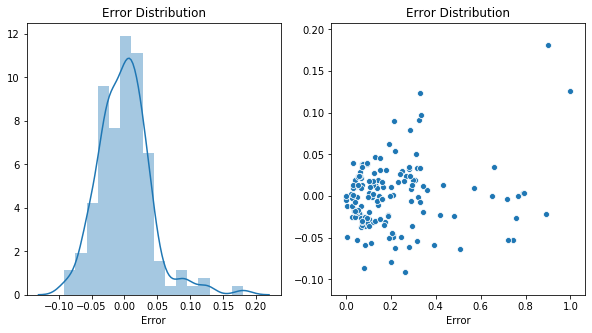

In [40]:
lr_model_1 = build_model(y_train, X_train)

* Number of variables = 65
* R Square = 96.3%
* Adjusted R Square = 94.9%
* Highest P value = 0.943
* Highest VIF = Infinity

Here Even though the R Square value is pretty high 97.0% there are multiple variables with High P values and infinite VIF value. **This model is totally not acceptable.**

### Automating Feature Selection Using RFE

We'll use RFE to select top 10 variables to use in the modelling and we'll fine tune after that.

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, 10)
rfe =rfe.fit(X_train, y_train)
rfe_list = sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x: x[2])

rfe_list

[('enginelocation', True, 1),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('dohc', True, 1),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('n_cyl_five', True, 1),
 ('n_cyl_four', True, 1),
 ('n_cyl_six', True, 1),
 ('luxury_car', True, 1),
 ('l', False, 2),
 ('ohcv', False, 3),
 ('horsepower', False, 4),
 ('n_cyl_twelve', False, 5),
 ('n_cyl_two', False, 6),
 ('enginesize', False, 7),
 ('stroke', False, 8),
 ('boreratio', False, 9),
 ('4bbl', False, 10),
 ('peakrpm', False, 11),
 ('fueltype', False, 12),
 ('mfi', False, 13),
 ('idi', False, 14),
 ('compressionratio', False, 15),
 ('spdi', False, 16),
 ('rotor', False, 17),
 ('highwaympg', False, 18),
 ('convertible', False, 19),
 ('wheelbase', False, 20),
 ('expensive_car', False, 21),
 ('fwd', False, 22),
 ('rwd', False, 23),
 ('carheight', False, 24),
 ('symboling', False, 25),
 ('sedan', False, 26),
 ('n_cyl_eight', False, 27),
 ('carlength', False, 28),
 ('wagon', False, 29),
 ('hardtop', False, 30),
 ('aspiration', False, 31),
 

Now we've all the variables listed in ascending order of their RFE values.

### Model - 2
We'll create a model with values that were selected by RFE

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              422.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                   7.08e-101
Time:                        22:22:50   Log-Likelihood:                          233.89
No. Observations:                 153   AIC:                                     -447.8
Df Residuals:                     143   BIC:                                     -417.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

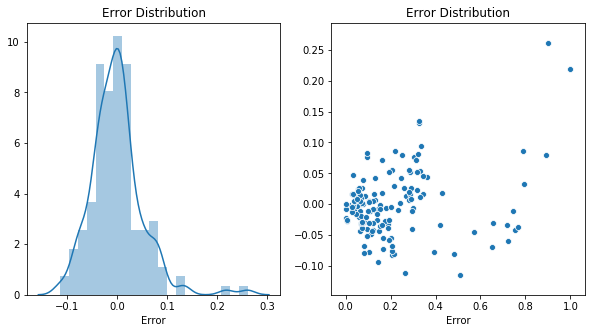

In [42]:
X_train = X_train[[c[0]for c in rfe_list if c[1]]]
lr_model_2 = build_model(y_train, X_train)

**Now all the variables have P values less than 0.35 and VIF of the variables are now descriptable (not infinity). We moved to 10 variables from 65 variables without losing much accuracy. The R Square value is 96.7% and the Adjusted R Squared value is higher than the previous model 96.5%**

* Number of variables = 10
* R Square = 96.7%
* Adjusted R Square = 96.5%
* Highest P value = 0.232
* Highest VIF = 45.81

### Model - 3
Now let's fine tune the model. We'll drop the variable with highest P value, that is `ohcf` and check the model's performance

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              468.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                   6.49e-102
Time:                        22:22:50   Log-Likelihood:                          233.13
No. Observations:                 153   AIC:                                     -448.3
Df Residuals:                     144   BIC:                                     -421.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

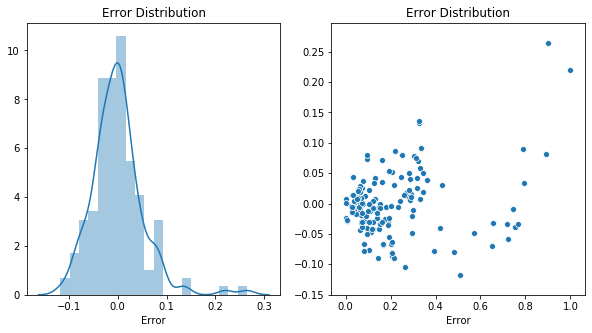

In [43]:
X_train.pop('ohcf')
lr_model_3 = build_model(y_train, X_train)

**The accuracy of the model remained unchanged even after dropping the variable. Now the P value of every model is acceptable since it's less than 0.05**

* Number of variables = 9
* R Square = 96.7%
* Adjusted R Square = 96.5%
* Highest P value = 0.019
* Highest VIF = 45.72

### Model - 4
Next we'll drop the variable with highest VIF, `carwidth`, and check model performance.

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              498.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                   2.11e-101
Time:                        22:22:50   Log-Likelihood:                          228.53
No. Observations:                 153   AIC:                                     -441.1
Df Residuals:                     145   BIC:                                     -416.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

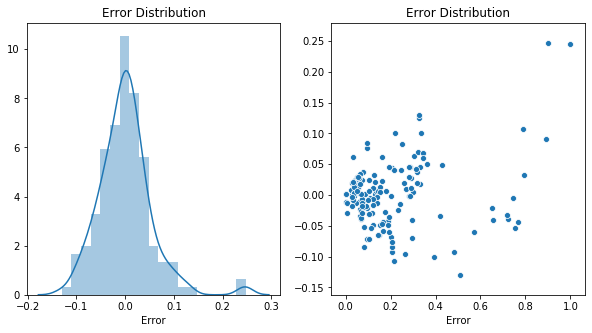

In [44]:
X_train.pop('carwidth')
lr_model_4 = build_model(y_train, X_train)

**The accuracy remains almost the same. VIF decreased but P Value increased.**

* Number of variables = 8
* R Square = 96.5%
* Adjusted R Square = 96.3%
* Highest P value = 0.081
* Highest VIF = 13.27


## Model - 5
We'll drop highest p value variable, `dohc`

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              561.0
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                   3.95e-102
Time:                        22:22:51   Log-Likelihood:                          226.92
No. Observations:                 153   AIC:                                     -439.8
Df Residuals:                     146   BIC:                                     -418.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

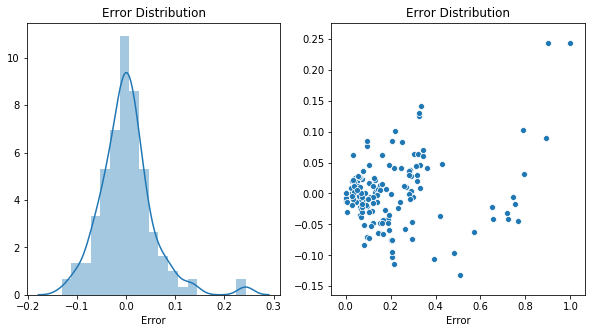

In [45]:
X_train.pop('dohc')
lr_model_5 = build_model(y_train, X_train)

**The accuracy remains almost the same. VIF decreased and P Value decreased.**

* Number of variables = 7
* R Square = 96.4%
* Adjusted R Square = 96.2%
* Highest P value = 0.004
* Highest VIF = 12.27

### Model - 6
Let's drop the variable with highest VIF, `n_cyl_four`

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              487.9
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                    2.28e-94
Time:                        22:22:51   Log-Likelihood:                          204.87
No. Observations:                 153   AIC:                                     -397.7
Df Residuals:                     147   BIC:                                     -379.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

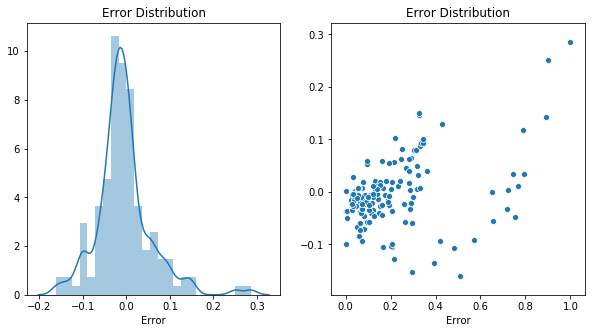

In [46]:
X_train.pop('n_cyl_four')
lr_model_6 = build_model(y_train, X_train)

**The accuracy remains almost the same. VIF decreased and P Value increased.**

* Number of variables = 6
* R Square = 95.2%
* Adjusted R Square = 95.0%
* Highest P value = 0.359
* Highest VIF = 3.03

### Model - 7
Dropping variable with highest P value, `n_cyl_five`

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              585.9
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                    1.36e-95
Time:                        22:22:51   Log-Likelihood:                          204.43
No. Observations:                 153   AIC:                                     -398.9
Df Residuals:                     148   BIC:                                     -383.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

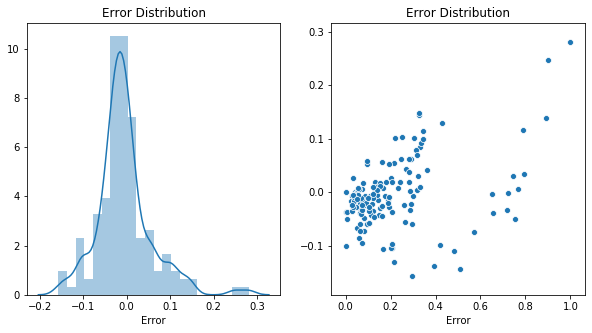

In [47]:
X_train.pop('n_cyl_five')
lr_model_7 = build_model(y_train, X_train)

**The accuracy remains the same. VIF decreased and P Value increased.**

* Number of variables = 5
* R Square = 95.2%
* Adjusted R Square = 95.0%
* Highest P value = 0.229
* Highest VIF = 2.98

### Model - 8
Dropping the variable with highest P value, `n_cyl_six`

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              729.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                    9.77e-97
Time:                        22:22:52   Log-Likelihood:                          203.68
No. Observations:                 153   AIC:                                     -399.4
Df Residuals:                     149   BIC:                                     -387.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

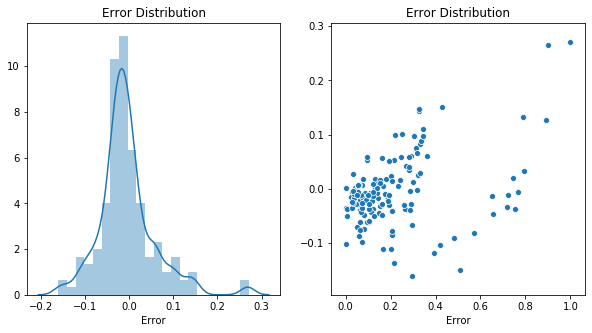

In [48]:
X_train.pop('n_cyl_six')
lr_model_8 = build_model(y_train, X_train)

**The accuracy remains the same. VIF decreased and P Value increased.**

* Number of variables = 4
* R Square = 95.1%
* Adjusted R Square = 95.0%
* Highest P value = 0.000
* Highest VIF = 2.64

This model seems to be the best model because,
* **It can describe 95.1% variance of Training Data**
* **No variables have p value > 0.05**
* **No variables have VIF > 5.00**
* **Errors are centered at 0 and normally distributed**
* **One cannot find any patterns in error terms or errors are hetroscedastic in nature**
* **F-Statistic is high and prob(F-Statistic) is low hence the output is not becuase of coincidence**

## Validation

Validating the best model on the test set.

In [49]:
from sklearn.metrics import r2_score        
y_test = test_data['price']
X_test = test_data[['enginelocation', 'curbweight', 'ohc', 'luxury_car']]
X_test.head()

,enginelocation,curbweight,ohc,luxury_car
47,0.0,1.000000,0.0,1.0
68,0.0,0.877424,1.0,1.0
181,0.0,0.645074,0.0,0.0
57,0.0,0.347944,0.0,0.0
89,0.0,0.155547,1.0,0.0


In [50]:
y_test_pred = lr_model_8.predict(X_test)
r2_score(y_test, y_test_pred)

0.8067536926807817

We're getting a **80.68%** accuracy in the validation set!

## Conclusion

The main variables which affect a car's price are
1. **enginelocation**  (1 if engine is located in the rear else 0)
2. **curbweight**
3. **ohc** (1 if engine type is ohc else 0)
4. **luxury_car** (1 if the car is luxury model else 0)

Putting the above in an equation

\begin{equation*}
price = 0.197*enginelocation + 0.469*curbweight - 0.035*ohc + 0.323*luxury\_car
\end{equation*}

## Inferences
1. If Geely Autos wants to produce high priced cars, they should
    1. produce cars with engine located in the rear
    2. produce cars with more curb weight
    3. NOT produce cars with OHC engines
    4. produce cars matching luxury car status
    
2. If Geely Autos wants to produce low priced cars, they should
    1. produce cars with engine located in the front
    2. produce cars with less curb weight
    3. produce cars with OHC engines
    4. NOT produce cars luxury cars
